In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan

try:
    import arviz as az
except ImportError as err:
    print("Please, install arviz for easy visualization of Stan models.")

import nest_asyncio
nest_asyncio.apply()

import pandas as pd

/home/krupkaa/anaconda3/envs/cognitive/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [3]:
# Read in the datafile first
data = pd.read_csv('sample_response_times.csv', delimiter = ';')

# Read in the model_code
with open('diffusion_model.stan', 'r') as program_file:
    model_code = program_file.read()

print(data['choice'].astype(float))


0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
295    0.0
296    0.0
297    1.0
298    1.0
299    1.0
Name: choice, Length: 300, dtype: float64


In [4]:
data_dict = {
    'N': data.shape[0],
    'y': list(data['rt'].astype(float)),
    'condition': list(data['condition'].astype(int)),
    'choice': list(data['choice'].astype(int))
}
data_dict

model = stan.build(model_code, data=data_dict)

Building...



Building: found in cache, done.

In [5]:
fit = model.sample(num_chains=4, num_samples=500, num_warmup=1000)

Sampling:   0%


Sampling:   0% (1/6000)
Sampling:   0% (2/6000)
Sampling:   0% (3/6000)
Sampling:   0% (4/6000)
Sampling:   2% (103/6000)
Sampling:   3% (202/6000)
Sampling:   5% (302/6000)
Sampling:   7% (402/6000)
Sampling:   8% (502/6000)
Sampling:  10% (601/6000)
Sampling:  12% (701/6000)
Sampling:  13% (801/6000)
Sampling:  15% (901/6000)
Sampling:  17% (1001/6000)
Sampling:  18% (1100/6000)
Sampling:  20% (1200/6000)
Sampling:  22% (1300/6000)
Sampling:  23% (1400/6000)
Sampling:  25% (1500/6000)
Sampling:  27% (1600/6000)
Sampling:  28% (1700/6000)
Sampling:  32% (1900/6000)
Sampling:  33% (2000/6000)
Sampling:  35% (2100/6000)
Sampling:  37% (2200/6000)
Sampling:  38% (2300/6000)
Sampling:  40% (2400/6000)
Sampling:  42% (2500/6000)
Sampling:  43% (2600/6000)
Sampling:  45% (2700/6000)
Sampling:  47% (2800/6000)
Sampling:  48% (2900/6000)
Sampling:  50% (3001/6000)
Sampling:  52% (3101/6000)
Sampling:  53% (3201/6000)
Sampling:  55% (3302/6000)
Sampling:  57% (3401/6000)
Sampling:  58% (3501/

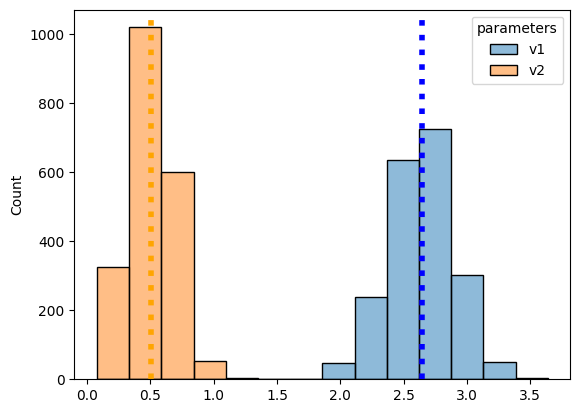

In [ ]:
results_df = fit.to_frame()

ax = sns.histplot(results_df[['v1', 'v2']])
ax.axvline(np.mean(results_df['v1']), color='blue', linestyle='dotted', lw=4)
ax.axvline(np.mean(results_df['v2']), color='orange', linestyle='dotted', lw=4)

In [ ]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v1,2.655,0.268,2.187,3.168,0.008,0.006,1205.0,1190.0,1.00
v2,0.521,0.180,0.201,0.855,0.006,0.005,839.0,591.0,1.00
a,0.851,0.026,0.805,0.901,0.001,0.001,1386.0,1335.0,1.00
tau,0.397,0.003,0.391,0.401,0.000,0.000,1287.0,1611.0,1.00
b,0.511,0.021,0.472,0.550,0.001,0.000,1200.0,1320.0,1.01


array([[<Axes: title={'center': 'v1'}>, <Axes: title={'center': 'v1'}>],
       [<Axes: title={'center': 'v2'}>, <Axes: title={'center': 'v2'}>]],
      dtype=object)

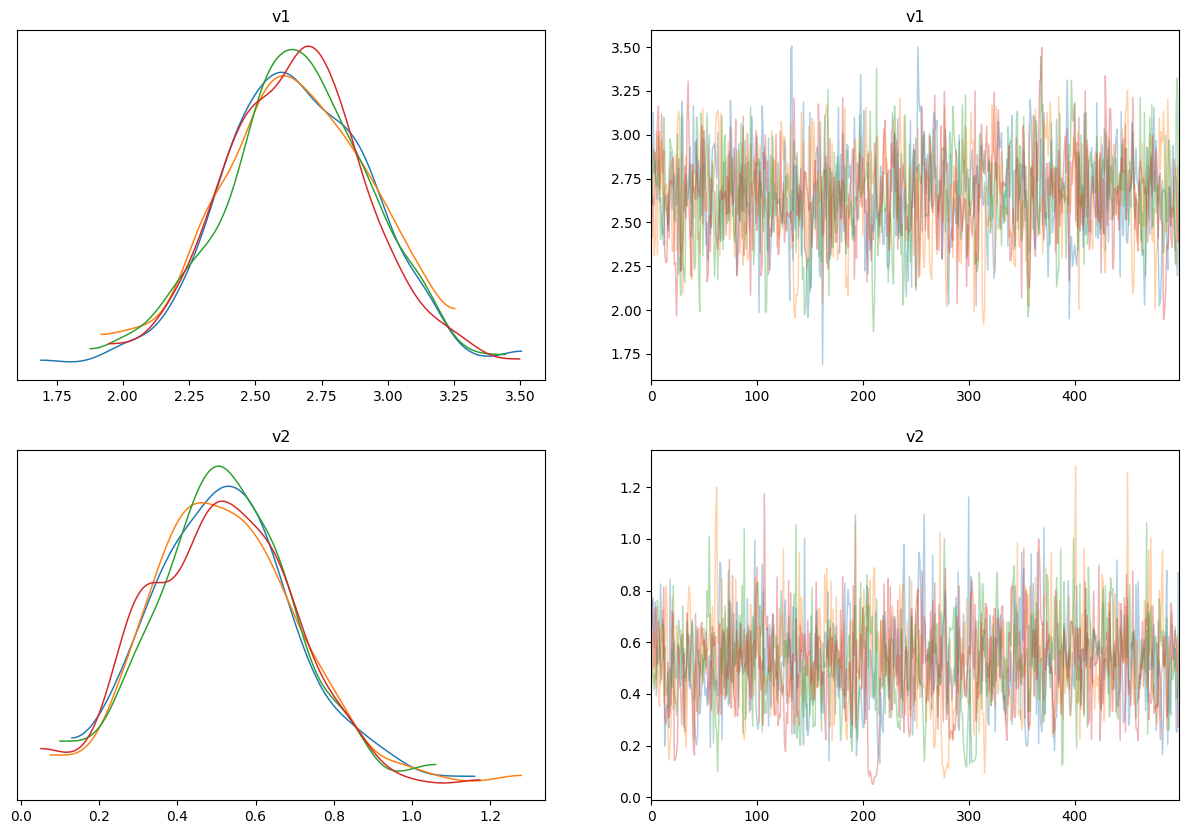

In [ ]:
az.plot_trace(fit, var_names=['v1', 'v2'], compact=False, figsize=(15, 10))